<a href="https://colab.research.google.com/github/EduardoWS/Reinforcement-Learning/blob/main/DDPGvTD3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

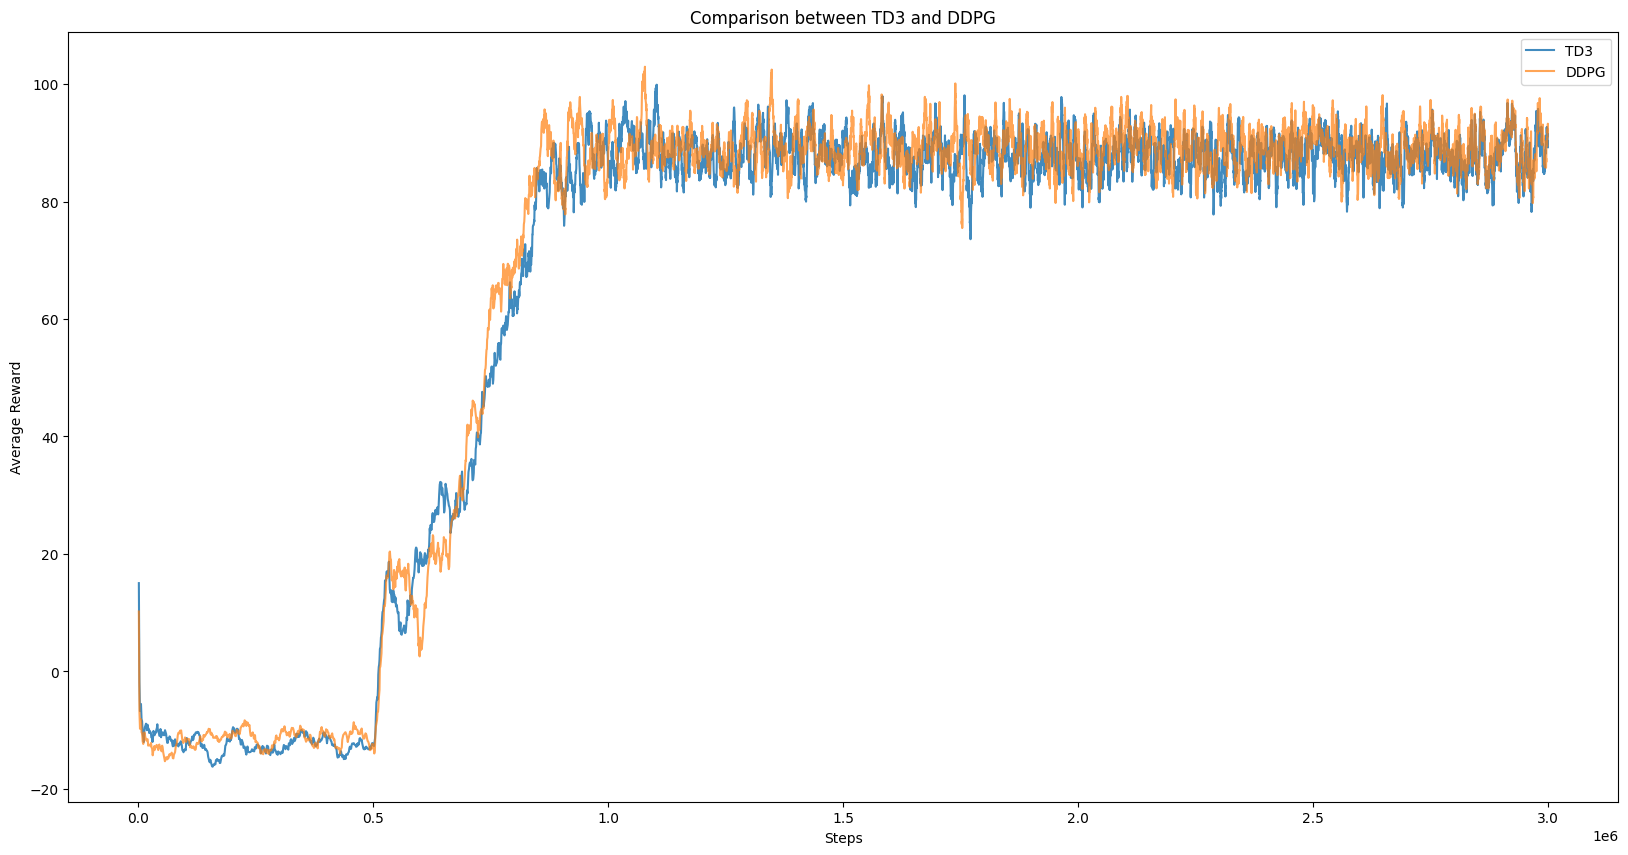

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Caminhos para os arquivos de eventos
td3_file_path = '/content/drive/MyDrive/PUB/board2/TD3_1/events.out.tfevents.1686154383.blastoise.3222910.0'
ddpg_file_path = '/content/drive/MyDrive/PUB/board2/DDPG_1/events.out.tfevents.1686196397.blastoise.3377734.0'

# Dicionários para armazenar os valores de cada algoritmo
td3_values = {}
ddpg_values = {}

# Função para processar cada evento no arquivo do TD3
def process_td3_event(event):
    for value in event.summary.value:
        if value.tag == 'rollout/ep_rew_mean':  # Substitua 'nome_da_sua_variavel_td3' pelo nome correto
            td3_values.setdefault(value.tag, []).append((value.simple_value, event.step))

# Função para processar cada evento no arquivo do DDPG
def process_ddpg_event(event):
    for value in event.summary.value:
        if value.tag == 'rollout/ep_rew_mean':  # Substitua 'nome_da_sua_variavel_ddpg' pelo nome correto
            ddpg_values.setdefault(value.tag, []).append((value.simple_value, event.step))

# Leitura do arquivo de eventos do TD3
for event in tf.compat.v1.train.summary_iterator(td3_file_path):
    process_td3_event(event)

# Leitura do arquivo de eventos do DDPG
for event in tf.compat.v1.train.summary_iterator(ddpg_file_path):
    process_ddpg_event(event)

# Plotando o gráfico
plt.figure(figsize=(20, 10))  # Tamanho da figura

# Plot do TD3
for tag, values in td3_values.items():
    x = [step for _, step in values]
    y = [value for value, _ in values]
    plt.plot(x, y, label=f'TD3', alpha=0.85)

# Plot do DDPG
for tag, values in ddpg_values.items():
    x = [step for _, step in values]
    y = [value for value, _ in values]
    plt.plot(x, y, label=f'DDPG', alpha=0.7)

plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Comparison between TD3 and DDPG')
plt.legend()

# Salvando o gráfico em PNG
plt.savefig('grafico.png')

plt.show()
